<a href="https://colab.research.google.com/github/AlexeyTri/Home_work_NN/blob/main/HomeWork_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexeyTri/Home_work_NN/refs/heads/main/data/BostonHousing.csv')

In [3]:
pd.get_dummies(df, drop_first=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
y = df['medv']

In [5]:
X = df[df.columns[df.columns != 'medv']]

In [6]:
X_scale = scale(X)
# = pd.DataFrame(X_scale, columns=X.columns)

In [7]:
X_scale.shape, y.shape

((506, 13), (506,))

In [8]:
acc_score = []
plot= []
for p in np.linspace(1, 10, 200):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p, )
    acc_score.append((p, cross_val_score(knn, X_scale, y, cv=kf, scoring='neg_mean_squared_error').mean()))
    plot.append(cross_val_score(knn, X_scale, y, cv=kf, scoring='neg_mean_squared_error').mean())

In [9]:
sorted(acc_score, key=lambda acc_score: acc_score[1])[0]

(np.float64(9.50251256281407), np.float64(-21.112469472718395))

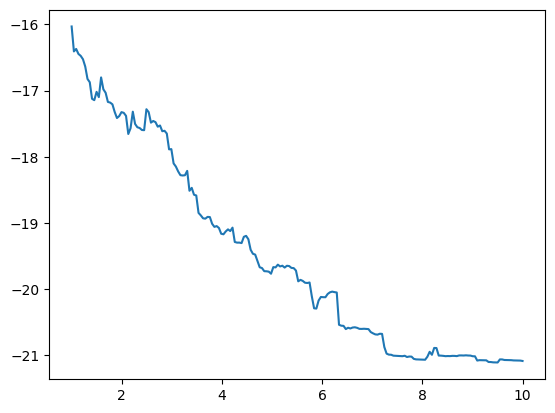

In [10]:
plt.plot(np.linspace(1, 10, 200), plot)